# Python Imports

In [53]:
import pandas as pd # For reading datasets
import seaborn as sns # For beautiful visuals
import matplotlib.pyplot as plt # For visuals
from IPython.display import display # For Pretty print of dataframes


import os
print(os.getcwd())



/Users/chadiabifadel/Files/Courses/UNSW/Master in Data Science/11- Data Science Project/project 2/UNSW-capstone-group-g/report


# Extract the data
The data is in zip format and we need to import it into a data structure that makes it easy to reference the objects that we have. The extraction process hass three steps:
- Unzip
- import CSVs
- check the import

## Unzip
The zips in directory `../data/Australia` are unzipped into `../extracted_zips`

the directory `../extracted_zips` is added to the `.gitignore`

In [54]:
import os
import zipfile

def extract_all_zips(source_dir, dest_dir):
    """
    Extracts all ZIP files found in the source directory and its subdirectories into the destination directory.
    
    :param source_dir: Path to the directory to search for ZIP files.
    :param dest_dir: Path to the directory where ZIP files should be extracted.
    """
    # Ensure the destination directory exists
    os.makedirs(dest_dir, exist_ok=True)

    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
        print(f'Created directory: {dest_dir}')
    # Walk through the source directory
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            # Check if the file is a ZIP file
            if file.endswith('.zip'):
                # Construct full file path
                zip_path = os.path.join(root, file)
                # Open the zip file
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    # Extract all the contents into the destination directory
                    zip_ref.extractall(dest_dir)
                    print(f'Extracted {file} into {dest_dir}')

# Usage
source_directory = '../data/Australia'
destination_directory = '../extracted_zips'
extract_all_zips(source_directory, destination_directory)

Extracted d.zip into ../extracted_zips
Extracted a.zip into ../extracted_zips
Extracted b.zip into ../extracted_zips
Extracted c.zip into ../extracted_zips


## Import the data
CSV files are imported into dataframes within a dictionary with key the CSV file name

In [55]:
import pandas as pd
import os

def create_dataframes_dict(base_directory):
    """
    Creates a dictionary of pandas DataFrames from CSV files located in subdirectories.
    Each key in the dictionary is the CSV file name.
    
    :param base_directory: The path to the directory containing the folders with CSV files.
    :return: A dictionary where each key is a combination of the folder name and the CSV file name (without the extension),
             and each value is the corresponding pandas DataFrame.
    """
    # Initialize an empty dictionary to store the dataframes
    dataframes = {}

    # Walk through all directories within the base directory
    for root, dirs, files in os.walk(base_directory):
        for dir_name in dirs:
            # Construct the path to the inside of the folder
            folder_path = os.path.join(root, dir_name)
            # List all CSV files in the current folder
            csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
            # Iterate over all found CSV files
            for csv_file in csv_files:
                # Construct the full path to the CSV file
                csv_file_path = os.path.join(folder_path, csv_file)
                # Read the CSV file into a DataFrame
                df = pd.read_csv(csv_file_path)
                # Create a unique key name combining folder and file name (without extension)
                key_name = f"{os.path.splitext(csv_file)[0]}"
                # Add the DataFrame to the dictionary
                dataframes[key_name] = df

        
    return dataframes

# Usage
base_directory = '../extracted_zips'  # Change this to your actual directory path
dataframes_dict = create_dataframes_dict(base_directory)


## Check that it's well imported
As a sanity check, dataframes in the dictionary are displayed with the info of each one

In [56]:
def display_dataframes(dataframes):   
    # Display information for each DataFrame
    for name, df in dataframes.items():
        print(f"DataFrame: {name}")
        df.info()  # Display information about the DataFrame
        display(df.head())  # Show the first few rows of the DataFrame
        print("-" * 80)  # Print a separator line

In [57]:
display_dataframes(dataframes_dict)

DataFrame: forecastdemand_vic
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095592 entries, 0 to 4095591
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PREDISPATCHSEQNO  int64  
 1   REGIONID          object 
 2   PERIODID          int64  
 3   FORECASTDEMAND    float64
 4   LASTCHANGED       object 
 5   DATETIME          object 
dtypes: float64(1), int64(2), object(3)
memory usage: 187.5+ MB


,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2016123018,VIC1,71,4160.74,2016-12-30 12:31:25,2017-01-01 00:00:00
1,2016123018,VIC1,72,3999.64,2016-12-30 12:31:25,2017-01-01 00:30:00
2,2016123018,VIC1,73,3836.30,2016-12-30 12:31:25,2017-01-01 01:00:00
3,2016123018,VIC1,74,3681.87,2016-12-30 12:31:25,2017-01-01 01:30:00
4,2016123018,VIC1,75,3457.38,2016-12-30 12:31:25,2017-01-01 02:00:00


--------------------------------------------------------------------------------
DataFrame: forecastdemand_qld
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095592 entries, 0 to 4095591
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PREDISPATCHSEQNO  int64  
 1   REGIONID          object 
 2   PERIODID          int64  
 3   FORECASTDEMAND    float64
 4   LASTCHANGED       object 
 5   DATETIME          object 
dtypes: float64(1), int64(2), object(3)
memory usage: 187.5+ MB


,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2016123018,QLD1,71,6425.36,2016-12-30 12:31:25,2017-01-01 00:00:00
1,2016123018,QLD1,72,6193.34,2016-12-30 12:31:25,2017-01-01 00:30:00
2,2016123018,QLD1,73,6016.45,2016-12-30 12:31:25,2017-01-01 01:00:00
3,2016123018,QLD1,74,5859.23,2016-12-30 12:31:25,2017-01-01 01:30:00
4,2016123018,QLD1,75,5767.15,2016-12-30 12:31:25,2017-01-01 02:00:00


--------------------------------------------------------------------------------
DataFrame: temprature_qld
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208085 entries, 0 to 208084
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   LOCATION     208085 non-null  object 
 1   DATETIME     208085 non-null  object 
 2   TEMPERATURE  208085 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.8+ MB


,LOCATION,DATETIME,TEMPERATURE
0,Brisbane Archerfield Airport,1/01/2010 0:00,23.6
1,Brisbane Archerfield Airport,1/01/2010 0:30,23.7
2,Brisbane Archerfield Airport,1/01/2010 1:00,23.5
3,Brisbane Archerfield Airport,1/01/2010 1:30,22.6
4,Brisbane Archerfield Airport,1/01/2010 2:00,22.0


--------------------------------------------------------------------------------
DataFrame: totaldemand_qld
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATETIME     196513 non-null  object 
 1   TOTALDEMAND  196513 non-null  float64
 2   REGIONID     196513 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.5+ MB


,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,5561.21,QLD1
1,2010-01-01 00:30:00,5422.25,QLD1
2,2010-01-01 01:00:00,5315.98,QLD1
3,2010-01-01 01:30:00,5186.70,QLD1
4,2010-01-01 02:00:00,5050.83,QLD1


--------------------------------------------------------------------------------
DataFrame: temprature_sa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208085 entries, 0 to 208084
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   208085 non-null  int64  
 1   LOCATION     208085 non-null  object 
 2   DATETIME     208085 non-null  object 
 3   TEMPERATURE  208085 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ MB


,Unnamed: 0,LOCATION,DATETIME,TEMPERATURE
0,0,Adelaide (Kent Town),2010-01-01 00:00:00,23.6
1,1,Adelaide (Kent Town),2010-01-01 00:30:00,23.7
2,2,Adelaide (Kent Town),2010-01-01 01:00:00,23.5
3,3,Adelaide (Kent Town),2010-01-01 01:30:00,22.6
4,4,Adelaide (Kent Town),2010-01-01 02:00:00,22.0


--------------------------------------------------------------------------------
DataFrame: totaldemand_sa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196512 entries, 0 to 196511
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATETIME     196512 non-null  object 
 1   TOTALDEMAND  196512 non-null  float64
 2   REGIONID     196512 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.5+ MB


,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:30:00,1385.23,SA1
1,2010-01-01 01:00:00,1338.53,SA1
2,2010-01-01 01:30:00,1260.39,SA1
3,2010-01-01 02:00:00,1189.31,SA1
4,2010-01-01 02:30:00,1141.12,SA1


--------------------------------------------------------------------------------
DataFrame: totaldemand_vic
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATETIME     196513 non-null  object 
 1   TOTALDEMAND  196513 non-null  float64
 2   REGIONID     196513 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.5+ MB


,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,5426.12,VIC1
1,2010-01-01 00:30:00,5111.02,VIC1
2,2010-01-01 01:00:00,4960.03,VIC1
3,2010-01-01 01:30:00,5283.40,VIC1
4,2010-01-01 02:00:00,5046.15,VIC1


--------------------------------------------------------------------------------
DataFrame: temprature_vic
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141681 entries, 0 to 141680
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   LOCATION     141681 non-null  object 
 1   DATETIME     141681 non-null  object 
 2   TEMPERATURE  141681 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.2+ MB


,LOCATION,DATETIME,TEMPERATURE
0,Melbourne (Olympic Park),31/05/2013 15:00,18.2
1,Melbourne (Olympic Park),31/05/2013 15:30,18.3
2,Melbourne (Olympic Park),31/05/2013 16:00,18.3
3,Melbourne (Olympic Park),31/05/2013 16:30,18.3
4,Melbourne (Olympic Park),31/05/2013 17:00,18.2


--------------------------------------------------------------------------------
DataFrame: forecastdemand_sa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095592 entries, 0 to 4095591
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PREDISPATCHSEQNO  int64  
 1   REGIONID          object 
 2   PERIODID          int64  
 3   FORECASTDEMAND    float64
 4   LASTCHANGED       object 
 5   DATETIME          object 
dtypes: float64(1), int64(2), object(3)
memory usage: 187.5+ MB


,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2016123018,SA1,71,1394.41,2016-12-30 12:31:25,2017-01-01 00:00:00
1,2016123018,SA1,72,1285.07,2016-12-30 12:31:25,2017-01-01 00:30:00
2,2016123018,SA1,73,1221.70,2016-12-30 12:31:25,2017-01-01 01:00:00
3,2016123018,SA1,74,1141.86,2016-12-30 12:31:25,2017-01-01 01:30:00
4,2016123018,SA1,75,1087.78,2016-12-30 12:31:25,2017-01-01 02:00:00


--------------------------------------------------------------------------------


# EDA

## displaying the imported dataframes

In [58]:
for key in dataframes_dict.keys():
    print(key)

forecastdemand_vic
forecastdemand_qld
temprature_qld
totaldemand_qld
temprature_sa
totaldemand_sa
totaldemand_vic
temprature_vic
forecastdemand_sa


## Organising the data by state

In [59]:
# Initialize a dictionary to hold data frames categorized by state
data_by_state = {}

# Populate the dictionary
for key, df in dataframes_dict.items():
    # Split the key to separate type and state
    parts = key.split('_')
    state = parts[-1]  # The state abbreviation is at the end
    if state not in data_by_state:
        data_by_state[state] = {}
    data_by_state[state][key] = df  # Store the entire DataFrame under its original key


for state in data_by_state.keys():
    print (">>>",f"Dataframes for {state}:")
    for key in data_by_state[state]:
        print(key)
    print("="*30,"\n")

>>> Dataframes for vic:
forecastdemand_vic
totaldemand_vic
temprature_vic

>>> Dataframes for qld:
forecastdemand_qld
temprature_qld
totaldemand_qld

>>> Dataframes for sa:
temprature_sa
totaldemand_sa
forecastdemand_sa



## Accessing the data in one state

In [63]:
for key in data_by_state['vic']:
    print(key)
    display(data_by_state['vic'][key].head())

forecastdemand_vic


,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2016123018,VIC1,71,4160.74,2016-12-30 12:31:25,2017-01-01 00:00:00
1,2016123018,VIC1,72,3999.64,2016-12-30 12:31:25,2017-01-01 00:30:00
2,2016123018,VIC1,73,3836.30,2016-12-30 12:31:25,2017-01-01 01:00:00
3,2016123018,VIC1,74,3681.87,2016-12-30 12:31:25,2017-01-01 01:30:00
4,2016123018,VIC1,75,3457.38,2016-12-30 12:31:25,2017-01-01 02:00:00


totaldemand_vic


,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,5426.12,VIC1
1,2010-01-01 00:30:00,5111.02,VIC1
2,2010-01-01 01:00:00,4960.03,VIC1
3,2010-01-01 01:30:00,5283.40,VIC1
4,2010-01-01 02:00:00,5046.15,VIC1


temprature_vic


,LOCATION,DATETIME,TEMPERATURE
0,Melbourne (Olympic Park),2013-05-31 15:00:00,18.2
1,Melbourne (Olympic Park),2013-05-31 15:30:00,18.3
2,Melbourne (Olympic Park),2013-05-31 16:00:00,18.3
3,Melbourne (Olympic Park),2013-05-31 16:30:00,18.3
4,Melbourne (Olympic Park),2013-05-31 17:00:00,18.2


## Changing the dates to datetime

In [65]:
for state, dfs in data_by_state.items():
    for df_name, df in dfs.items():
        # Check if 'LASTCHANGED' column exists before attempting to convert its data type
        if 'LASTCHANGED' in df.columns:
            df['LASTCHANGED'] = pd.to_datetime(df['LASTCHANGED'])
        
        # Check if 'DATETIME' column exists before attempting to convert its data type
        if 'DATETIME' in df.columns:
            df['DATETIME'] = pd.to_datetime(df['DATETIME'])

## Sanity Check

In [66]:
# Assuming 'data_by_state' is your nested dictionary structure
for state, dfs in data_by_state.items():
    print(f"State: {state}")
    for df_name, df in dfs.items():
        print(f"DataFrame: {df_name}")
        # Check and print data types for 'LASTCHANGED' and 'DATETIME'
        if 'LASTCHANGED' in df.columns:
            print("LASTCHANGED data type:", df['LASTCHANGED'].dtype)
            # Display the first few rows to visually inspect the conversion
            display("Sample LASTCHANGED values:", df['LASTCHANGED'].head())
        else:
            print("No 'LASTCHANGED' column in this DataFrame.")
        
        if 'DATETIME' in df.columns:
            print("DATETIME data type:", df['DATETIME'].dtype)
            # Display the first few rows to visually inspect the conversion
            print("Sample DATETIME values:", df['DATETIME'].head())
        else:
            print("No 'DATETIME' column in this DataFrame.")
        
        print('\n',"-" * 50,'\n')  # Print a separator for readability

State: vic
DataFrame: forecastdemand_vic
LASTCHANGED data type: datetime64[ns]


'Sample LASTCHANGED values:'

0   2016-12-30 12:31:25
1   2016-12-30 12:31:25
2   2016-12-30 12:31:25
3   2016-12-30 12:31:25
4   2016-12-30 12:31:25
Name: LASTCHANGED, dtype: datetime64[ns]

DATETIME data type: datetime64[ns]
Sample DATETIME values: 0   2017-01-01 00:00:00
1   2017-01-01 00:30:00
2   2017-01-01 01:00:00
3   2017-01-01 01:30:00
4   2017-01-01 02:00:00
Name: DATETIME, dtype: datetime64[ns]

 -------------------------------------------------- 

DataFrame: totaldemand_vic
No 'LASTCHANGED' column in this DataFrame.
DATETIME data type: datetime64[ns]
Sample DATETIME values: 0   2010-01-01 00:00:00
1   2010-01-01 00:30:00
2   2010-01-01 01:00:00
3   2010-01-01 01:30:00
4   2010-01-01 02:00:00
Name: DATETIME, dtype: datetime64[ns]

 -------------------------------------------------- 

DataFrame: temprature_vic
No 'LASTCHANGED' column in this DataFrame.
DATETIME data type: datetime64[ns]
Sample DATETIME values: 0   2013-05-31 15:00:00
1   2013-05-31 15:30:00
2   2013-05-31 16:00:00
3   2013-05-31 16:30:00
4   2013-05-31 17:00:00
Name: DATETIME, dtype: datetime64[ns]

 -------------------------------------------------- 

State: qld
DataFrame: forecastdemand_qld
LAST

'Sample LASTCHANGED values:'

0   2016-12-30 12:31:25
1   2016-12-30 12:31:25
2   2016-12-30 12:31:25
3   2016-12-30 12:31:25
4   2016-12-30 12:31:25
Name: LASTCHANGED, dtype: datetime64[ns]

DATETIME data type: datetime64[ns]
Sample DATETIME values: 0   2017-01-01 00:00:00
1   2017-01-01 00:30:00
2   2017-01-01 01:00:00
3   2017-01-01 01:30:00
4   2017-01-01 02:00:00
Name: DATETIME, dtype: datetime64[ns]

 -------------------------------------------------- 

DataFrame: temprature_qld
No 'LASTCHANGED' column in this DataFrame.
DATETIME data type: datetime64[ns]
Sample DATETIME values: 0   2010-01-01 00:00:00
1   2010-01-01 00:30:00
2   2010-01-01 01:00:00
3   2010-01-01 01:30:00
4   2010-01-01 02:00:00
Name: DATETIME, dtype: datetime64[ns]

 -------------------------------------------------- 

DataFrame: totaldemand_qld
No 'LASTCHANGED' column in this DataFrame.
DATETIME data type: datetime64[ns]
Sample DATETIME values: 0   2010-01-01 00:00:00
1   2010-01-01 00:30:00
2   2010-01-01 01:00:00
3   2010-01-01 01:30:00
4   2010-01-01 02:00:00
Name: DATETIME, dtype: datetime64[ns]

 -------------------------------------------------- 

State: sa
DataFrame: temprature_sa
No 'LASTCH

'Sample LASTCHANGED values:'

0   2016-12-30 12:31:25
1   2016-12-30 12:31:25
2   2016-12-30 12:31:25
3   2016-12-30 12:31:25
4   2016-12-30 12:31:25
Name: LASTCHANGED, dtype: datetime64[ns]

DATETIME data type: datetime64[ns]
Sample DATETIME values: 0   2017-01-01 00:00:00
1   2017-01-01 00:30:00
2   2017-01-01 01:00:00
3   2017-01-01 01:30:00
4   2017-01-01 02:00:00
Name: DATETIME, dtype: datetime64[ns]

 -------------------------------------------------- 



## Initial data Exploration

### Basic structure

In [68]:
import pandas as pd

# Assuming 'data_by_state' is your nested dictionary structure
for state, dfs in data_by_state.items():
    print(f"\nState: {state}")
    for df_name, df in dfs.items():
        print(f"\nDataFrame: {df_name}")
        # Display the first few rows to get an idea of the data
        display(df.head())
        # Display data types and missing values
        print(df.info())
        # Display summary statistics for numerical columns
        print(df.describe())



State: vic

DataFrame: forecastdemand_vic


,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2016123018,VIC1,71,4160.74,2016-12-30 12:31:25,2017-01-01 00:00:00
1,2016123018,VIC1,72,3999.64,2016-12-30 12:31:25,2017-01-01 00:30:00
2,2016123018,VIC1,73,3836.30,2016-12-30 12:31:25,2017-01-01 01:00:00
3,2016123018,VIC1,74,3681.87,2016-12-30 12:31:25,2017-01-01 01:30:00
4,2016123018,VIC1,75,3457.38,2016-12-30 12:31:25,2017-01-01 02:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095592 entries, 0 to 4095591
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PREDISPATCHSEQNO  int64         
 1   REGIONID          object        
 2   PERIODID          int64         
 3   FORECASTDEMAND    float64       
 4   LASTCHANGED       datetime64[ns]
 5   DATETIME          datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 187.5+ MB
None
       PREDISPATCHSEQNO      PERIODID  FORECASTDEMAND
count      4.095592e+06  4.095592e+06    4.095592e+06
mean       2.018688e+09  2.998370e+01    4.862913e+03
std        1.214396e+06  1.869790e+01    8.704415e+02
min        2.016123e+09  1.000000e+00    2.354240e+03
25%        2.018012e+09  1.400000e+01    4.213920e+03
50%        2.019021e+09  2.800000e+01    4.749945e+03
75%        2.020023e+09  4.400000e+01    5.383632e+03
max        2.021032e+09  7.900000e+01    9.738030e+03

DataFrame

,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,5426.12,VIC1
1,2010-01-01 00:30:00,5111.02,VIC1
2,2010-01-01 01:00:00,4960.03,VIC1
3,2010-01-01 01:30:00,5283.40,VIC1
4,2010-01-01 02:00:00,5046.15,VIC1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATETIME     196513 non-null  datetime64[ns]
 1   TOTALDEMAND  196513 non-null  float64       
 2   REGIONID     196513 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ MB
None
         TOTALDEMAND
count  196513.000000
mean     5252.950834
std       946.281304
min      2307.070000
25%      4535.420000
50%      5157.760000
75%      5909.540000
max     10240.220000

DataFrame: temprature_vic


,LOCATION,DATETIME,TEMPERATURE
0,Melbourne (Olympic Park),2013-05-31 15:00:00,18.2
1,Melbourne (Olympic Park),2013-05-31 15:30:00,18.3
2,Melbourne (Olympic Park),2013-05-31 16:00:00,18.3
3,Melbourne (Olympic Park),2013-05-31 16:30:00,18.3
4,Melbourne (Olympic Park),2013-05-31 17:00:00,18.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141681 entries, 0 to 141680
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   LOCATION     141681 non-null  object        
 1   DATETIME     141681 non-null  datetime64[ns]
 2   TEMPERATURE  141681 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.2+ MB
None
         TEMPERATURE
count  141681.000000
mean       15.711337
std         5.637641
min         0.800000
25%        11.800000
50%        14.900000
75%        18.700000
max        43.300000

State: qld

DataFrame: forecastdemand_qld


,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2016123018,QLD1,71,6425.36,2016-12-30 12:31:25,2017-01-01 00:00:00
1,2016123018,QLD1,72,6193.34,2016-12-30 12:31:25,2017-01-01 00:30:00
2,2016123018,QLD1,73,6016.45,2016-12-30 12:31:25,2017-01-01 01:00:00
3,2016123018,QLD1,74,5859.23,2016-12-30 12:31:25,2017-01-01 01:30:00
4,2016123018,QLD1,75,5767.15,2016-12-30 12:31:25,2017-01-01 02:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095592 entries, 0 to 4095591
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PREDISPATCHSEQNO  int64         
 1   REGIONID          object        
 2   PERIODID          int64         
 3   FORECASTDEMAND    float64       
 4   LASTCHANGED       datetime64[ns]
 5   DATETIME          datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 187.5+ MB
None
       PREDISPATCHSEQNO      PERIODID  FORECASTDEMAND
count      4.095592e+06  4.095592e+06    4.095592e+06
mean       2.018688e+09  2.998370e+01    6.217552e+03
std        1.214396e+06  1.869790e+01    8.990330e+02
min        2.016123e+09  1.000000e+00    3.634990e+03
25%        2.018012e+09  1.400000e+01    5.493320e+03
50%        2.019021e+09  2.800000e+01    6.105220e+03
75%        2.020023e+09  4.400000e+01    6.833010e+03
max        2.021032e+09  7.900000e+01    1.004541e+04

DataFrame

,LOCATION,DATETIME,TEMPERATURE
0,Brisbane Archerfield Airport,2010-01-01 00:00:00,23.6
1,Brisbane Archerfield Airport,2010-01-01 00:30:00,23.7
2,Brisbane Archerfield Airport,2010-01-01 01:00:00,23.5
3,Brisbane Archerfield Airport,2010-01-01 01:30:00,22.6
4,Brisbane Archerfield Airport,2010-01-01 02:00:00,22.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208085 entries, 0 to 208084
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   LOCATION     208085 non-null  object        
 1   DATETIME     208085 non-null  datetime64[ns]
 2   TEMPERATURE  208085 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ MB
None
         TEMPERATURE
count  208085.000000
mean       20.375972
std         5.586945
min         1.300000
25%        16.600000
50%        20.900000
75%        24.300000
max        42.400000

DataFrame: totaldemand_qld


,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:00:00,5561.21,QLD1
1,2010-01-01 00:30:00,5422.25,QLD1
2,2010-01-01 01:00:00,5315.98,QLD1
3,2010-01-01 01:30:00,5186.70,QLD1
4,2010-01-01 02:00:00,5050.83,QLD1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATETIME     196513 non-null  datetime64[ns]
 1   TOTALDEMAND  196513 non-null  float64       
 2   REGIONID     196513 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ MB
None
         TOTALDEMAND
count  196513.000000
mean     6026.545773
std       868.481406
min      3748.240000
25%      5368.770000
50%      5993.590000
75%      6601.290000
max      9988.090000

State: sa

DataFrame: temprature_sa


,Unnamed: 0,LOCATION,DATETIME,TEMPERATURE
0,0,Adelaide (Kent Town),2010-01-01 00:00:00,23.6
1,1,Adelaide (Kent Town),2010-01-01 00:30:00,23.7
2,2,Adelaide (Kent Town),2010-01-01 01:00:00,23.5
3,3,Adelaide (Kent Town),2010-01-01 01:30:00,22.6
4,4,Adelaide (Kent Town),2010-01-01 02:00:00,22.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208085 entries, 0 to 208084
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   208085 non-null  int64         
 1   LOCATION     208085 non-null  object        
 2   DATETIME     208085 non-null  datetime64[ns]
 3   TEMPERATURE  208085 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None
         Unnamed: 0    TEMPERATURE
count  208085.00000  208085.000000
mean   104042.00000      20.375972
std     60069.10972       5.586945
min         0.00000       1.300000
25%     52021.00000      16.600000
50%    104042.00000      20.900000
75%    156063.00000      24.300000
max    208084.00000      42.400000

DataFrame: totaldemand_sa


,DATETIME,TOTALDEMAND,REGIONID
0,2010-01-01 00:30:00,1385.23,SA1
1,2010-01-01 01:00:00,1338.53,SA1
2,2010-01-01 01:30:00,1260.39,SA1
3,2010-01-01 02:00:00,1189.31,SA1
4,2010-01-01 02:30:00,1141.12,SA1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196512 entries, 0 to 196511
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATETIME     196512 non-null  datetime64[ns]
 1   TOTALDEMAND  196512 non-null  float64       
 2   REGIONID     196512 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.5+ MB
None
         TOTALDEMAND
count  196512.000000
mean     1383.901566
std       326.494153
min        21.890000
25%      1164.480000
50%      1346.140000
75%      1567.342500
max      3385.420000

DataFrame: forecastdemand_sa


,PREDISPATCHSEQNO,REGIONID,PERIODID,FORECASTDEMAND,LASTCHANGED,DATETIME
0,2016123018,SA1,71,1394.41,2016-12-30 12:31:25,2017-01-01 00:00:00
1,2016123018,SA1,72,1285.07,2016-12-30 12:31:25,2017-01-01 00:30:00
2,2016123018,SA1,73,1221.70,2016-12-30 12:31:25,2017-01-01 01:00:00
3,2016123018,SA1,74,1141.86,2016-12-30 12:31:25,2017-01-01 01:30:00
4,2016123018,SA1,75,1087.78,2016-12-30 12:31:25,2017-01-01 02:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095592 entries, 0 to 4095591
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PREDISPATCHSEQNO  int64         
 1   REGIONID          object        
 2   PERIODID          int64         
 3   FORECASTDEMAND    float64       
 4   LASTCHANGED       datetime64[ns]
 5   DATETIME          datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 187.5+ MB
None
       PREDISPATCHSEQNO      PERIODID  FORECASTDEMAND
count      4.095592e+06  4.095592e+06    4.095592e+06
mean       2.018688e+09  2.998370e+01    1.299720e+03
std        1.214396e+06  1.869790e+01    3.293395e+02
min        2.016123e+09  1.000000e+00    1.198300e+02
25%        2.018012e+09  1.400000e+01    1.103100e+03
50%        2.019021e+09  2.800000e+01    1.269130e+03
75%        2.020023e+09  4.400000e+01    1.463940e+03
max        2.021032e+09  7.900000e+01    3.161750e+03


### Missing values
The doesn't seem to be missing values in our data

In [2]:
for state, dfs in data_by_state.items():
    for df_name, df in dfs.items():
        print(f"\nMissing values in {state} - {df_name}:")
        print(sumdf.isnull().sum())


NameError: name 'data_by_state' is not defined

### Duplicates

In [78]:
## Check duplicates

###  Distribution

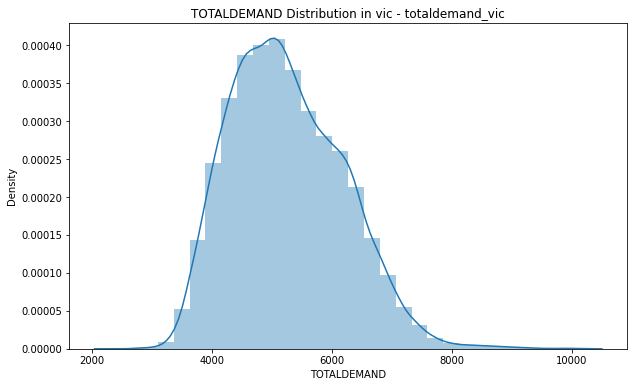

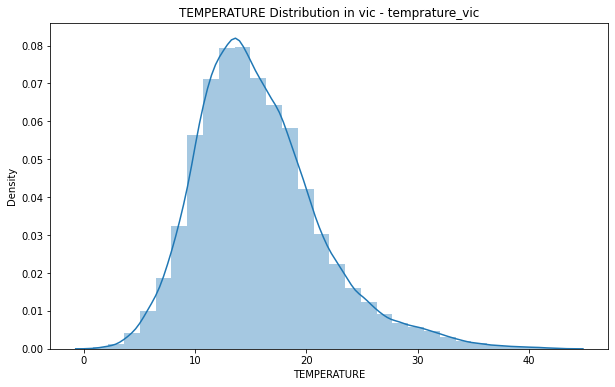

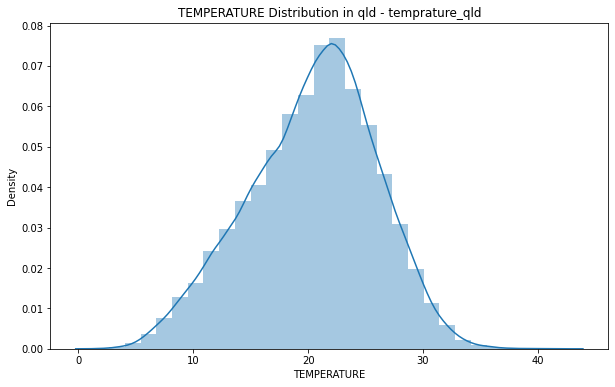

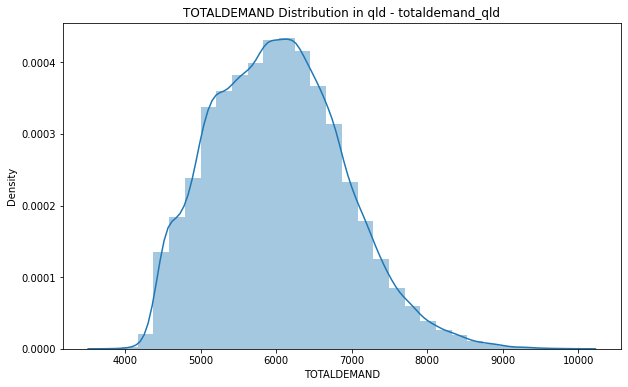

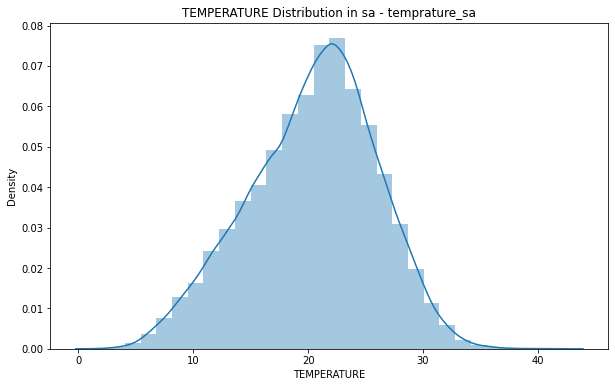

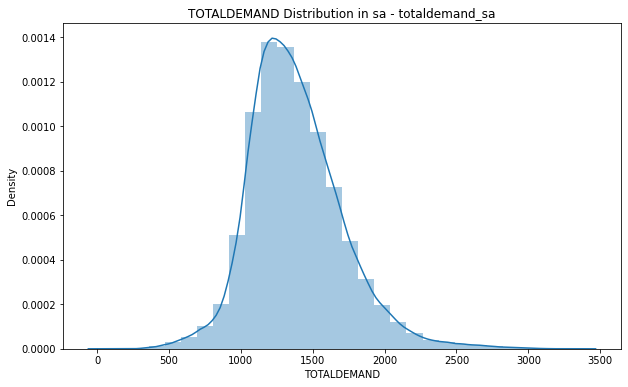

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

for state, dfs in data_by_state.items():
    for df_name, df in dfs.items():
        for column in ['TOTALDEMAND', 'TEMPERATURE']:  # Add other relevant columns
            if column in df.columns:
                plt.figure(figsize=(10, 6))
                sns.distplot(df[column].dropna(), kde=True, bins=30)  # dropna() to remove missing values
                plt.title(f"{column} Distribution in {state} - {df_name}")
                plt.xlabel(column)
                plt.ylabel('Density')
                plt.show()


### Time Series Trend: forcast demand

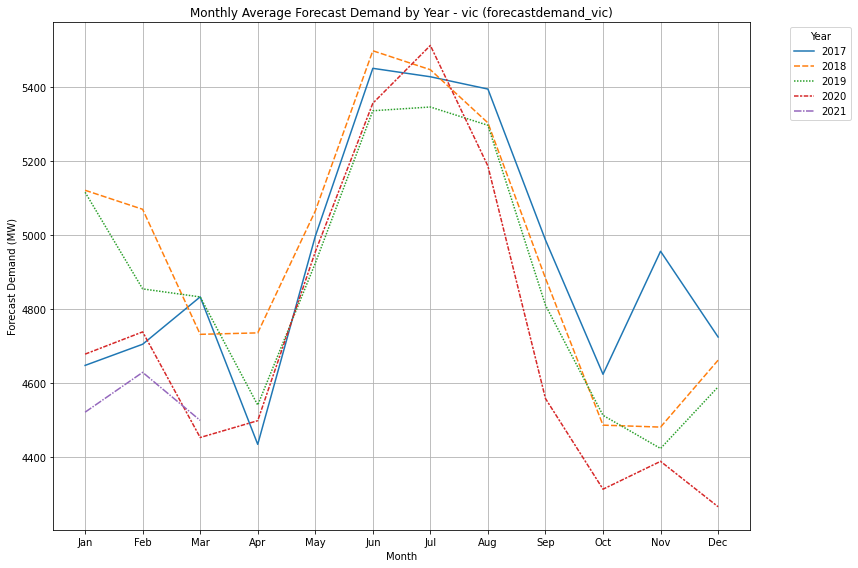

The DataFrame 'totaldemand_vic' for vic does not contain the column 'FORECASTDEMAND'.
The DataFrame 'temprature_vic' for vic does not contain the column 'FORECASTDEMAND'.


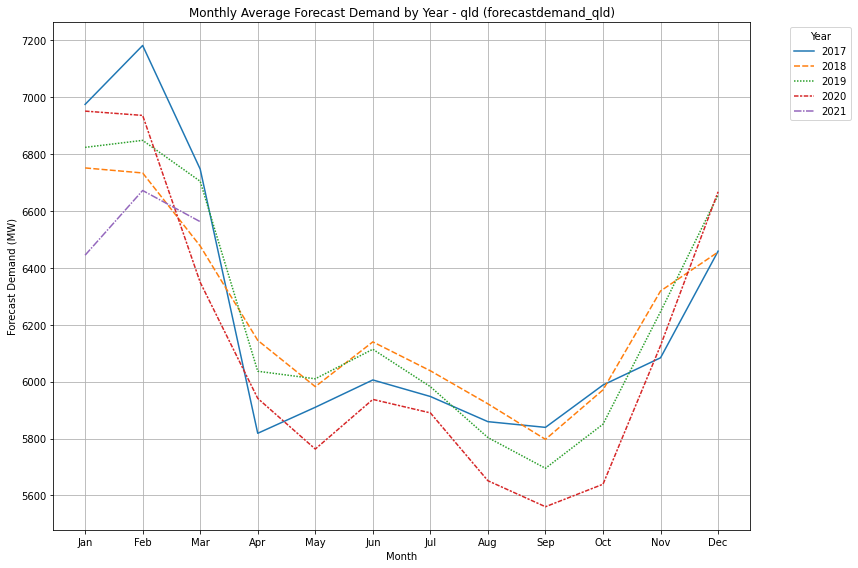

The DataFrame 'temprature_qld' for qld does not contain the column 'FORECASTDEMAND'.
The DataFrame 'totaldemand_qld' for qld does not contain the column 'FORECASTDEMAND'.
The DataFrame 'temprature_sa' for sa does not contain the column 'FORECASTDEMAND'.
The DataFrame 'totaldemand_sa' for sa does not contain the column 'FORECASTDEMAND'.


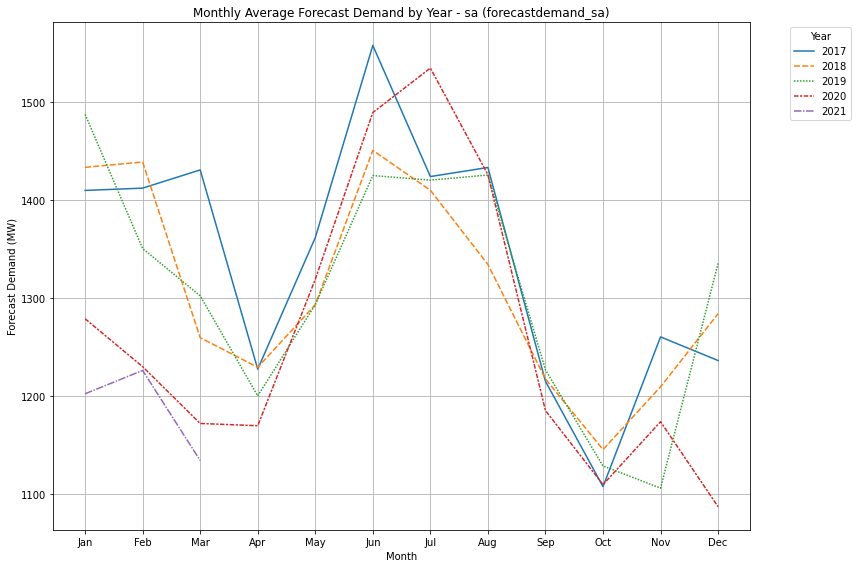

In [76]:
for state, dfs in data_by_state.items():
    for df_name, df in dfs.items():
        # Check if 'FORECASTDEMAND' column exists in the DataFrame
        if 'FORECASTDEMAND' in df.columns:
            # Extract year and month from 'DATETIME'
            df['YEAR'] = df['DATETIME'].dt.year
            df['MONTH'] = df['DATETIME'].dt.month

            # Group by year and month, then calculate the average forecast demand
            monthly_demand = df.groupby(['YEAR', 'MONTH'])['FORECASTDEMAND'].mean().unstack(level=0)

            # Plotting
            plt.figure(figsize=(12, 8))
            sns.lineplot(data=monthly_demand)
            plt.title(f'Monthly Average Forecast Demand by Year - {state} ({df_name})')
            plt.xlabel('Month')
            plt.ylabel('Forecast Demand (MW)')
            plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print(f"The DataFrame '{df_name}' for {state} does not contain the column 'FORECASTDEMAND'.")